In [223]:
df_list = []
for score in list(np.arange(0.6, 1.0, 0.05)) + [1.0]:
    mapping_df = (
        mapping_routine.prep_trait_efo_mapping_agg(
            ebi_data=EBI_DATA,
            model_collection=info_stage2.model_collection,
            batet_score=score,
        )
        .assign(Batet_score=score)[["Model", "Total", "Batet_score"]]
        .rename(columns={"Model": "Method", "Batet_score": "EFO-Batet"})
    )
    df_list.append(mapping_df)

mapping_df = pd.concat(df_list)
mapping_df

,Method,Total,EFO-Batet
0,Manual,1191.0,0.6
1,BLUEBERT-EFO,769.0,0.6
2,BioSentVec,693.0,0.6
3,SciSpacy,664.0,0.6
4,Zooma,615.0,0.6
...,...,...,...
5,BlueBERT,347.0,1.0
6,BioBERT,343.0,1.0
7,GUSE,341.0,1.0
8,Spacy,340.0,1.0


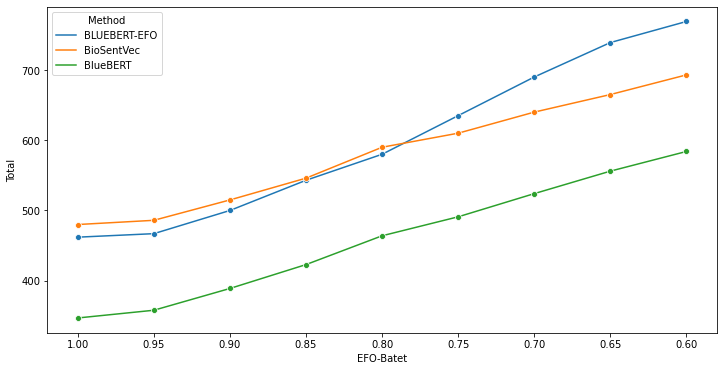

In [224]:
plt.figure(figsize=(12, 6))
plot_df = mapping_df[
    mapping_df["Method"].isin(["BLUEBERT-EFO", "BlueBERT", "BioSentVec"])
].reset_index(drop=True)
ax = sns.lineplot(data=plot_df, x="EFO-Batet", y="Total", hue="Method", marker="o")
ax.invert_xaxis()

output_file = output_dir / "top-counts-batet-line.png"
fig = ax.get_figure()
plt.savefig(output_file)

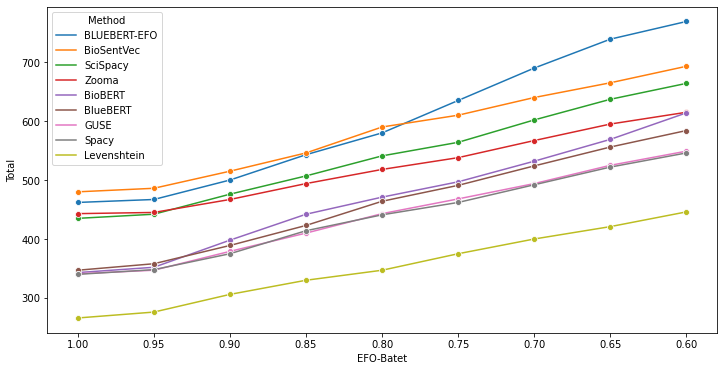

In [227]:
plt.figure(figsize=(12, 6))
plot_df = mapping_df[mapping_df["Method"] != "Manual"].reset_index(drop=True)
ax = sns.lineplot(data=plot_df, x="EFO-Batet", y="Total", hue="Method", marker="o")
ax.invert_xaxis()

output_file = output_dir / "top-counts-batet-line-all.png"
fig = ax.get_figure()
plt.savefig(output_file)